In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sympy import symbols, solve
import sympy as sy
from matplotlib import dates
import quandl
quandl.ApiConfig.api_key = 'wGGRbbFeNsQmr9xnbpt8'


In [2]:
Wheat = quandl.get('ODA/PWHEAMT_USD')
Oil = quandl.get('WGEC/WLD_CRUDE_WTI')
Gold = quandl.get('BUNDESBANK/BBK01_WT5511')

In [3]:
file1='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/GDP_per_capita.csv' 
file2='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/Malnutrition.csv' 
file3='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/GDP_country.csv' 
file4='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/Malnutrition_country.csv'
file5='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/CO2.csv'
file6='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/School.csv'
file7='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/Fertility.csv'
file8='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/CPI2016_Results.xlsx'
file9='/Users/aliceqichaowu/Desktop/18785-DATA INF APP ML/HW2/hpi-data-2016.xlsx'
df_GDP_perc=pd.read_csv(file1)
df_Mal=pd.read_csv(file2)
Mal_country=pd.read_csv(file4)
GDP_country=pd.read_csv(file3)
CO2=pd.read_csv(file5)
School=pd.read_csv(file6,skiprows=4)
Fertility=pd.read_csv(file7)
CPI=pd.read_excel(file8)
HPI=pd.read_excel(file9,sheet_name='Complete HPI data',skiprows=5)

/Users/aliceqichaowu/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [4]:
df_GDP_perc.head(5)
df_Mal.head(5)
Mal_country=Mal_country.iloc[:,0:3]
GDP_country=GDP_country.iloc[:,0:3]
df_GDP_perc.insert(2, 'Region',GDP_country.iloc[:,1] , True)
df_GDP_perc.insert(3, 'Income Group',GDP_country.iloc[:,2] , True)
df_Mal.insert(2, 'Region',Mal_country.iloc[:,1] , True)
df_Mal.insert(3, 'Income Group',Mal_country.iloc[:,2] , True)

There is a negative correlation. The higher the GPD per capita, the lower the percentage of children with malnutrition


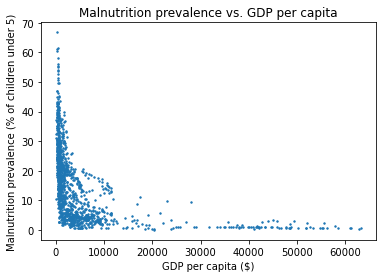

In [5]:
## Q1
ax = plt.gca()
plt.scatter(df_GDP_perc.iloc[:,6:],df_Mal.iloc[:,6:],s=2)
plt.ylabel('Malnutrition prevalence (% of children under 5)')
plt.xlabel('GDP per capita ($)')
plt.title('Malnutrition prevalence vs. GDP per capita')
print('There is a negative correlation. The higher the GPD per capita, the lower the percentage of children with malnutrition')

Text(0.5, 1.0, 'Group by geographical regions')

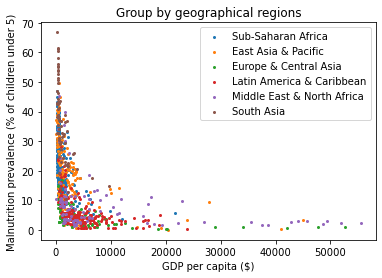

In [6]:
GDP_perc_group=df_GDP_perc.groupby('Region')
GDP_perc_group.indices.pop('North America')

GDP_reg=list(GDP_perc_group.indices.keys())
GDP_ind=list(GDP_perc_group.indices.values())
GDP_years=np.array(df_GDP_perc.iloc[:,6:])
Mal_years=np.array(df_Mal.iloc[:,6:])
plt.figure()
for i in range(0,6):
    plt.scatter(GDP_years[GDP_ind[i],:],Mal_years[GDP_ind[i],:],s=4)
plt.legend (GDP_reg)
plt.ylabel('Malnutrition prevalence (% of children under 5)')
plt.xlabel('GDP per capita ($)')
plt.title( 'Group by geographical regions' )

Text(0.5, 1.0, 'Group by income levels')

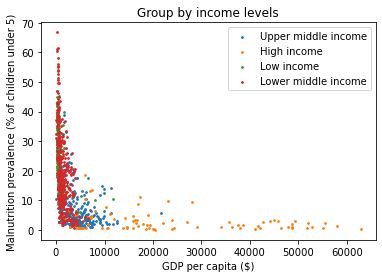

In [13]:
GDP_perc_group2=df_GDP_perc.groupby('Income Group')
GDP_reg=list(GDP_perc_group2.indices.keys())
GDP_ind=list(GDP_perc_group2.indices.values())
GDP_years=np.array(df_GDP_perc.iloc[:,6:])
Mal_years=np.array(df_Mal.iloc[:,6:])
plt.figure()
for i in range(0,4):
    plt.scatter(GDP_years[GDP_ind[i],:],Mal_years[GDP_ind[i],:],s=3)
plt.legend (GDP_reg)
plt.ylabel('Malnutrition prevalence (% of children under 5)')
plt.xlabel('GDP per capita ($)')
plt.title( 'Group by income levels' )

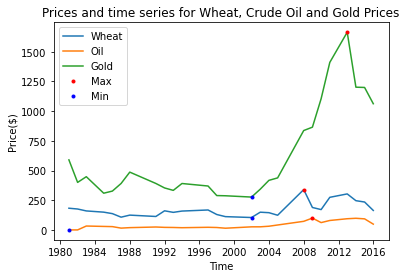

1980-12-31 00:00:00 2001-12-31 00:00:00


In [175]:
## Q2
Wheat.head(5)
Oil.head(5)
Gold.head(5)

idx1=Wheat.index
idx2=Oil.index
idx3=Gold.index

idx4=idx1.intersection(idx2)
idx5=idx4.intersection(idx3)
Wheat=Wheat.reindex(idx5)
Oil=Oil.reindex(idx5)
Gold=Gold.reindex(idx5)

plt.plot(Wheat['Value'], label="Wheat")
plt.plot(Wheat['Value'].idxmax(),Wheat['Value'].max(),'r.')
plt.plot(Wheat['Value'].idxmin(),Wheat['Value'].min(),'b.')

plt.plot(Oil['Value'], label="Oil")
plt.plot(Oil['Value'].idxmax(),Oil['Value'].max(),'r.')
plt.plot(Oil['Value'].idxmin(),Oil['Value'].min(),'b.')

plt.plot(Gold['Value'], label="Gold") 
plt.plot(Gold['Value'].idxmax(),Gold['Value'].max(),'r.',label='Max')
plt.plot(Gold['Value'].idxmin(),Gold['Value'].min(),'b.',label='Min')

plt.ylabel("Price($)")
plt.xlabel("Time")
plt.title('Prices and time series for Wheat, Crude Oil and Gold Prices')
plt.legend()
plt.show()
print(Oil['Value'].idxmin(),Gold['Value'].idxmin())

In [10]:
## Q3


print(CO2['2010'].describe())
print('CO2: 5%',CO2['2010'].quantile(.05))
print('CO2: 95%',CO2['2010'].quantile(.95))
print(" ")
print(School['2010'].describe())
print('School: 5%',School['2010'].quantile(.05))
print('School: 95%',School['2010'].quantile(.95))

count    239.000000
mean       4.333087
std        5.016823
min        0.034580
25%        0.721447
50%        2.682569
75%        6.084064
max       32.634302
Name: 2010, dtype: float64
CO2: 5% 0.11287533029999999
CO2: 95% 15.510796306999998
 
count    166.000000
mean      90.105088
std        9.527627
min       45.077410
25%       87.801005
50%       92.956725
75%       95.934427
max       99.713540
Name: 2010, dtype: float64
School: 5% 66.65682
School: 95% 98.87278749999999


Text(0.5, 1.0, 'Fertility rate vs. GDP per capita for all countries in 2010')

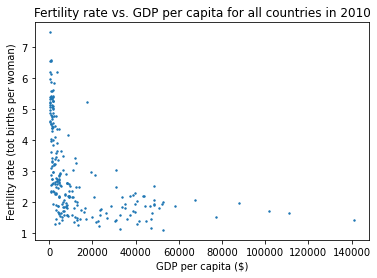

In [187]:
## Q4
ax = plt.gca()
plt.scatter(df_GDP_perc['2010'],Fertility['2010'],s=2)
plt.ylabel('Fertility rate (tot births per woman)')
plt.xlabel('GDP per capita ($)')
plt.title('Fertility rate vs. GDP per capita for all countries in 2010')

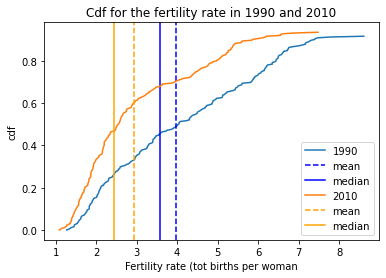

In [180]:

x2010 = np.sort(np.array(Fertility['2010']))
x1990 = np.sort(np.array(Fertility['1990']))

y1990 =  np.arange(len(x1990)) / float(len(x1990))
y2010 = np.arange(len(x2010)) / float(len(x2010))

plt.plot(x1990, y1990,label='1990')                       
plt.axvline(x = Fertility['1990'].mean(),color='b',linestyle='--',label='mean')
plt.axvline(x = Fertility['1990'].median(),color='b',linestyle='-',label='median')

plt.plot(x2010, y2010,label='2010')
plt.axvline(x = Fertility['2010'].mean(),color='orange',linestyle='--',label = 'mean')
plt.axvline(x = Fertility['2010'].median(),color='orange',linestyle='-',label = 'median')
plt.xlabel('Fertility rate (tot births per woman)')
plt.ylabel('cdf')
plt.legend()
plt.title('Cdf for the fertility rate in 1990 and 2010')
plt.show()

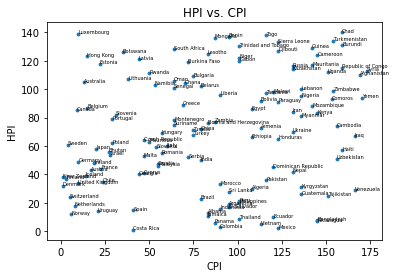

In [16]:
## Q5
Common=pd.merge(HPI,CPI,left_on=["Country"], right_on = ["Country"])
text1=Common['Country']

x=Common['Rank']
y=Common['HPI Rank']
plt.scatter(x,y,s=8)
plt.ylabel('HPI')
plt.xlabel('CPI')
plt.title('HPI vs. CPI')

for i in range(len(text1)):
    plt.annotate(text1[i], (x[i], y[i] + 0.2),fontsize=5)
plt.show()